In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

# Data Gathering

In [4]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

In [5]:
X.head(5)

,400,402,405,407,410,412,415,417,420,422,425,427,429,432,434,437,439,442,444,447,449,452,454,456,459,461,464,466,469,471,473,476,478,481,483,486,488,490,493,495,...,2059,2060,2062,2063,2064,2066,2067,2069,2070,2071,2073,2074,2075,2077,2078,2080,2081,2082,2084,2085,2086,2088,2089,2090,2092,2093,2095,2096,2097,2099,2100,2101,2103,2104,2105,2107,2108,2109,2111,2112
0,0.0,-0.015237,-0.030607,-0.038309,-0.039078,-0.035809,-0.031176,-0.030395,-0.033311,-0.031603,-0.029029,-0.027017,-0.023923,-0.023089,-0.022887,-0.023431,-0.021522,-0.019085,-0.014493,-0.010299,-0.007162,-0.001613,-0.000884,-0.000422,-0.002360,-0.008521,-0.016031,-0.021649,-0.025670,-0.028673,-0.030710,-0.031130,-0.033908,-0.035281,-0.033560,-0.030399,-0.028369,-0.027015,-0.026973,-0.026572,...,-0.019911,-0.019392,-0.018788,-0.018147,-0.017145,-0.015055,-0.014112,-0.012940,-0.010862,-0.010315,-0.008649,-0.007339,-0.006597,-0.007014,-0.006499,-0.006988,-0.007263,-0.007636,-0.007912,-0.008513,-0.009587,-0.010287,-0.010253,-0.010344,-0.010287,-0.009237,-0.008095,-0.006511,-0.005528,-0.003925,-0.001685,-0.000553,0.000118,0.000566,0.001245,0.000846,0.001106,0.001005,0.000117,0.0
1,0.0,-0.012098,-0.028164,-0.035189,-0.036138,-0.031050,-0.026015,-0.027539,-0.028084,-0.027075,-0.024482,-0.024488,-0.020674,-0.018735,-0.016772,-0.017374,-0.017536,-0.015779,-0.011583,-0.007659,-0.003295,0.002564,0.004428,0.002030,-0.003143,-0.009042,-0.015947,-0.022246,-0.024380,-0.026792,-0.028200,-0.029259,-0.028254,-0.031574,-0.031143,-0.029238,-0.025832,-0.025221,-0.025594,-0.025478,...,-0.019666,-0.019018,-0.018893,-0.018161,-0.017468,-0.016286,-0.014693,-0.012581,-0.010726,-0.009771,-0.008544,-0.008128,-0.007880,-0.007757,-0.007337,-0.006892,-0.007355,-0.008054,-0.007779,-0.008332,-0.009235,-0.011156,-0.011155,-0.010654,-0.010498,-0.010021,-0.008818,-0.008206,-0.006635,-0.003641,-0.002085,-0.000998,0.000278,-0.000123,0.000384,0.001010,0.000583,-0.000397,-0.000160,0.0
2,0.0,-0.013000,-0.029058,-0.035021,-0.034994,-0.033025,-0.028413,-0.028470,-0.029737,-0.029198,-0.027586,-0.024469,-0.021270,-0.019984,-0.019583,-0.018314,-0.018392,-0.016918,-0.011521,-0.009108,-0.006081,-0.001813,0.002349,0.001358,-0.001706,-0.008666,-0.015624,-0.020840,-0.023616,-0.025856,-0.029256,-0.031035,-0.032548,-0.032103,-0.031035,-0.029178,-0.028168,-0.027377,-0.026703,-0.026582,...,-0.020003,-0.019639,-0.018817,-0.017958,-0.016725,-0.015944,-0.014359,-0.012702,-0.010391,-0.009467,-0.009313,-0.008842,-0.007386,-0.006873,-0.007031,-0.006847,-0.007573,-0.008399,-0.007496,-0.008255,-0.009022,-0.009741,-0.010444,-0.010550,-0.010543,-0.010172,-0.008845,-0.007153,-0.005227,-0.003439,-0.002707,-0.001554,0.000050,0.000866,0.000877,0.000871,0.001093,0.001058,0.000614,0.0
3,0.0,-0.015728,-0.034346,-0.045140,-0.047671,-0.044334,-0.040807,-0.040474,-0.041417,-0.040699,-0.036610,-0.036377,-0.033297,-0.032839,-0.033168,-0.031503,-0.031416,-0.029823,-0.025193,-0.020556,-0.018720,-0.013459,-0.009910,-0.012380,-0.015447,-0.020543,-0.026913,-0.031178,-0.036045,-0.039913,-0.044614,-0.047182,-0.047303,-0.044051,-0.041352,-0.039536,-0.038828,-0.038440,-0.040463,-0.040142,...,-0.019607,-0.019869,-0.019853,-0.019573,-0.017698,-0.015874,-0.014224,-0.012073,-0.010223,-0.009152,-0.009072,-0.008536,-0.008542,-0.007065,-0.006479,-0.007114,-0.007711,-0.007981,-0.008319,-0.008915,-0.009574,-0.010086,-0.009881,-0.010710,-0.010635,-0.009859,-0.009841,-0.008379,-0.006478,-0.004779,-0.003241,-0.001541,-0.000198,0.000202,0.001023,0.000625,0.000420,0.000543,-0.000071,0.0
4,0.0,-0.020355,-0.045839,-0.060556,-0.065805,-0.064988,-0.062097,-0.061955,-0.064759,-0.066886,-0.065625,-0.062423,-0.058715,-0.058247,-0.058555,-0.058997,-0.057635,-0.051298,-0.047146,-0.043159,-0.039921,-0.035516,-0.029893,-0.028711,-0.031150,-0.036035,-0.046485,-0.052642,-0.058205,-0.066228,-0.066753,-0.063257,-0.065455,-0.066602,-0.063851,-0.061635,-0.061857,-0.061059,-0.060902,-0.061338,...,-0.019481,-0.018248,-0.018142,-0.017994,-0.015880,-0.013989,-0.012890,-0.010609,-0.0092

# PCA

In [10]:
pca = PCA(n_components=3)
pca = pca.fit(X)
pca = pca.transform(X)

In [11]:
df_pca = pd.DataFrame(data = pca, 
                           columns = ['principal component 1', 'principal component 2', 'principal component 3'])
df_pca

,principal component 1,principal component 2,principal component 3
0,-0.014449,-0.008556,-0.015282
1,0.020889,-0.002852,-0.036308
2,0.031462,-0.008162,-0.025340
3,-0.166812,0.018141,-0.061733
4,-0.446469,0.053718,0.095595
...,...,...,...
304,0.026278,-0.011807,-0.069936
305,-0.127235,-0.023582,0.007653
306,-0.086025,-0.122807,-0.101048
307,-0.028024,-0.120553,-0.138774


In [12]:
df_final = pd.concat([df_pca, y['diagnostic']], axis = 1)
df_final

,principal component 1,principal component 2,principal component 3,diagnostic
0,-0.014449,-0.008556,-0.015282,0
1,0.020889,-0.002852,-0.036308,0
2,0.031462,-0.008162,-0.025340,0
3,-0.166812,0.018141,-0.061733,0
4,-0.446469,0.053718,0.095595,0
...,...,...,...,...
304,0.026278,-0.011807,-0.069936,1
305,-0.127235,-0.023582,0.007653,1
306,-0.086025,-0.122807,-0.101048,1
307,-0.028024,-0.120553,-0.138774,1


# PCA 2D Visualization

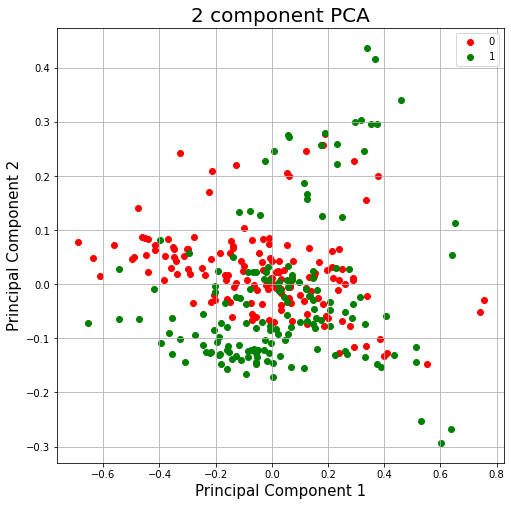

In [37]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'g']

for target, color in zip(targets, colors):
    indicesToKeep = df_final['diagnostic'] == target
    ax.scatter(df_final.loc[indicesToKeep, 'principal component 1'],
               df_final.loc[indicesToKeep, 'principal component 2'],
               c = color)
    
ax.legend(targets)
ax.grid()

# PCA 3D Visualization

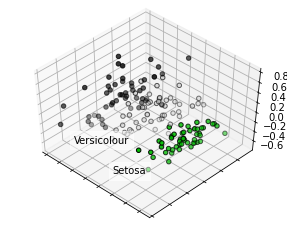

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])

plt.show()